In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [103]:
# Reading the data
data = pd.read_csv('../tmdb-box-office-prediction/train.csv')

In [104]:
# look at first to view entries for overview
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [105]:
# Get main information about dataset
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [106]:
# Look at correlations
data.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


## Investigating feature 'popularity'

### Check for potentially corrupted data

In [107]:
len(data)

3000

In [108]:
len(data[data.popularity.isna()])

0

In [109]:
len(data[data.popularity == 0])

0

In [110]:
len(data[data.revenue == 0])

0

In [111]:
len(data[data.revenue.isna()])

0

In [112]:
len(data[data.revenue < 10000])

92

In [113]:
data_cleaned = data[data.revenue >= 10000]

* Insights
    * It is unclear where popularity values stem from so it is hard to say data they make much sense or not
    * However, at least there are no zeros and no nans, min and max are not too small or too big, so it seems reasonable to use all values

### Try to find linear relationship to revenue (potentially using transformations)

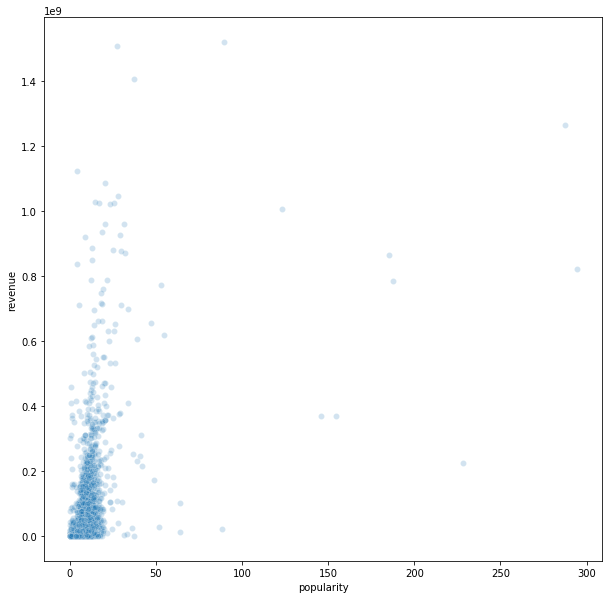

In [127]:
# draw scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(x='popularity', y='revenue', data=data, alpha=0.2)

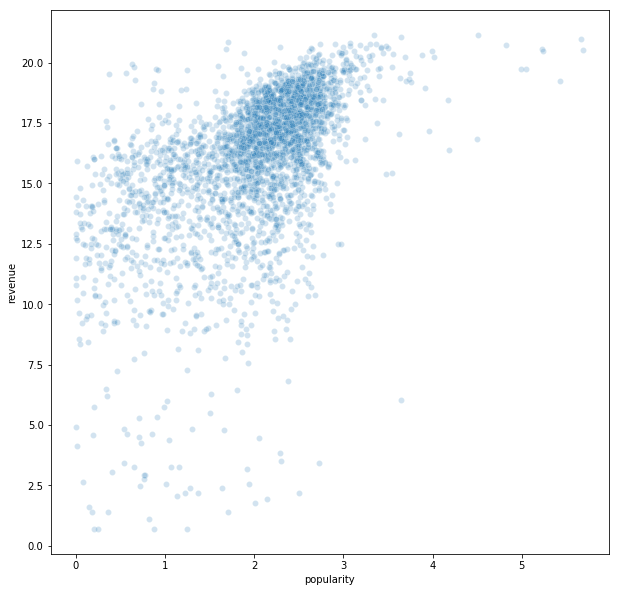

In [134]:
# playing around with logarithms, closest to linear seems log1p(popularity) vs log1p(revenue)
plt.figure(figsize=(10,10))
sns.scatterplot(x=np.log1p(data.popularity), y=np.log1p(data.revenue), alpha=0.2)

In [132]:
# identify linear model for log1p-log relationsship
linModel = LinearRegression()
x = np.log1p(data[['popularity']])
y = np.log1p(data['revenue'])
linModel.fit(x,y)
y_pred = linModel.predict(x)

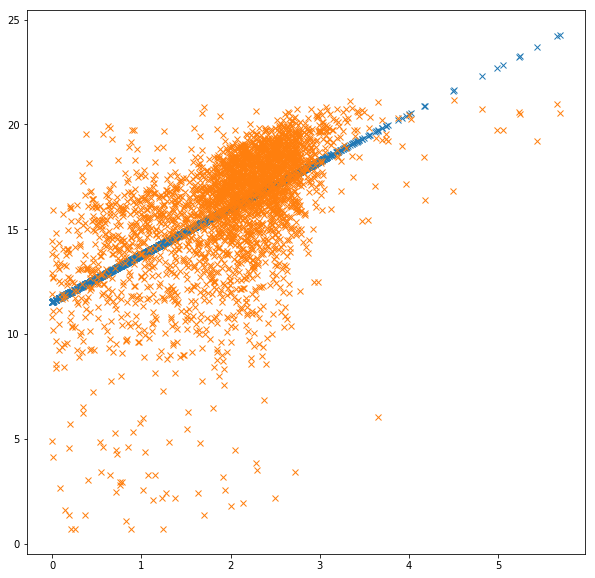

In [133]:
# plot data vs. prediction
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y_pred,'x',x,y,'x')

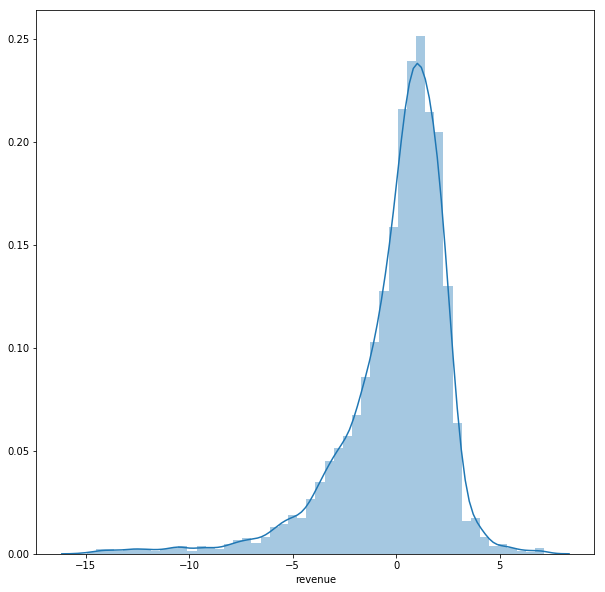

In [135]:
# plot distribution of residuals (desire: should be normally distributed)
plt.figure(figsize=(10,10))
sns.distplot(y-y_pred)

* Insights:
    * Native data does not show linear relationship
    * Tried only logarithmic transformations
    * log-log seems to be closest to linear at first sight, disadvantage: had to transform the target variable which would affect relation to all other features, too, if we seriously tried an overall linear approach
    * Comparing prediction to transformed data indicates that linear model is potentially distored by data samples with high popularity, it might be worth to find out if these could be outliers
    * Distribution of residuals is not really normal, but could be close enough
    
    

### Further investigation of 'popularity'

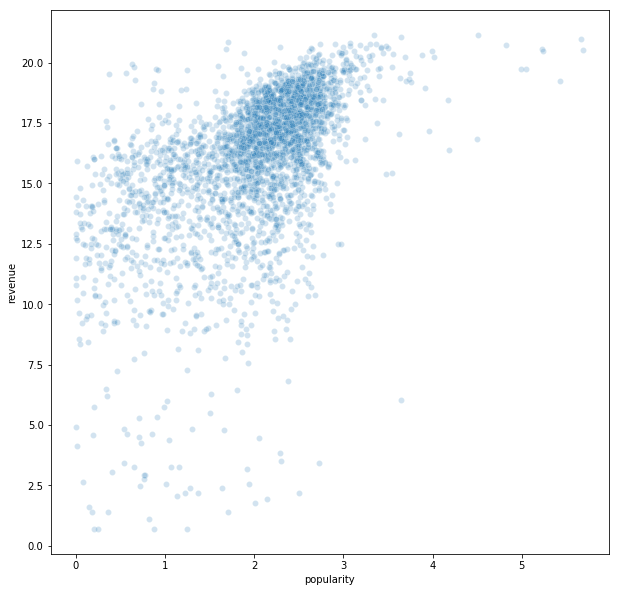

In [136]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=np.log1p(data.popularity), y=np.log1p(data.revenue), alpha=0.2)

In [137]:
popularity_outliers_high = data[np.log1p(data.popularity) > 3.5]

In [138]:
len(popularity_outliers_high)

29

In [139]:
popularity_outliers_high.head(30)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
518,519,"[{'id': 468552, 'name': 'Wonder Woman Collecti...",149000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.warnerbros.com/wonder-woman,tt0451279,en,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037,...,5/30/17,141.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Power. Grace. Wisdom. Wonder.,Wonder Woman,"[{'id': 849, 'name': 'dc comics'}, {'id': 1701...",NaN,NaN,820580447
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,...,3/16/17,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337
934,935,"[{'id': 404609, 'name': 'John Wick Collection'...",40000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.johnwick.movie/,tt4425200,en,John Wick: Chapter 2,John Wick is forced out of retirement by a for...,49.247505,...,2/8/17,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Never stab the devil in the back,John Wick: Chapter 2,"[{'id': 131, 'name': 'italy'}, {'id': 1419, 'n...",NaN,NaN,171539887
1093,1094,"[{'id': 230, 'name': 'The Godfather Collection...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,...,3/14/72,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,"[{'id': 131, 'name': 'italy'}, {'id': 699, 'na...","[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093db', 'de...",245066411
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,4/25/12,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910
1140,1141,NaN,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0118799,it,La vita è bella,A touching story of an Italian book seller of ...,39.394970,...,12/20/97,116.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"An unforgettable fable that proves love, famil...",Life Is Beautiful,"[{'id': 131, 'name': 'italy'}, {'id': 483, 'na...","[{'cast_id': 7, 'character': 'Dora', 'credit_i...","[{'credit_id': '52fe4262c3a36847f801a10b', 'de...",229400000
1309,1310,NaN,61000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",http://www.gonegirlmovie.com/,tt2267998,en,Gone Girl,With his wife's disappearance having become th...,154.801009,...,10/1/14,145.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You don't know what you've got 'til it's...,Gone Girl,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 7, 'character': 'Nick Dunne', 'cr...","[{'credit_id': '52fe

In [123]:
popularity_outliers_low = data[np.log1p(data.popularity) < 0.1]

In [124]:
len(popularity_outliers_low)

29

In [125]:
popularity_outliers_low.head(30)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
177,178,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0118762,en,Boys Life 2,Compilation of four short films about homoerot...,0.060645,...,3/7/97,74.0,NaN,Released,NaN,Boys Life 2,"[{'id': 237, 'name': 'gay'}, {'id': 187056, 'n...","[{'cast_id': 1, 'character': 'Eric', 'credit_i...","[{'credit_id': '52fe47b9c3a36847f8144e3f', 'de...",532654
254,255,NaN,11178,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt2244376,en,Bwakaw,"Bwakaw is a drama-comedy about growing old, an...",0.079287,...,9/5/12,104.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,"In life, you only need one true friend.",Voracious,"[{'id': 4694, 'name': 'staged death'}, {'id': ...","[{'cast_id': 16, 'character': 'Rene', 'credit_...","[{'credit_id': '52fe4a5cc3a368484e14eef3', 'de...",34659
457,458,NaN,250000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105508,en,Swoon,"In a film based on actual events, teenagers Na...",0.003013,...,9/11/92,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Swoon,NaN,"[{'cast_id': 1000, 'character': 'Richard Loeb'...","[{'credit_id': '52fe48b4c3a36847f81750e7', 'de...",340147
470,471,NaN,2000000,NaN,NaN,tt0349159,en,"The Book of Mormon Movie, Volume 1: The Journey",The story of Lehi and his wife Sariah and thei...,0.079856,...,9/12/03,120.0,NaN,Released,"2600 years ago, one family began a remarkable ...","The Book of Mormon Movie, Volume 1: The Journey",NaN,"[{'cast_id': 1, 'character': 'Sam', 'credit_id...",NaN,1672730
741,742,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 878, ...",NaN,tt0101343,en,And You Thought Your Parents Were Weird,Two boys follow in their late fathers foot ste...,0.000578,...,11/15/91,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,And You Thought Your Parents Were Weird!,"[{'id': 5202, 'name': 'boy'}, {'id': 13130, 'n...","[{'cast_id': 3, 'character': 'Sarah Carson', '...","[{'credit_id': '52fe4978c3a368484e12ce53', 'de...",402539
773,774,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0264802,en,Live Nude Girls Unite!,Documentary look at the 1996-97 effort of the ...,0.001272,...,10/6/00,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Nude Girls Unite!,"[{'id': 582, 'name': 'san francisco'}, {'id': ...",[],"[{'credit_id': '52fe4a249251416c750df26b', 'de...",48752
862,863,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt1638979,en,"Hey, Boo: Harper Lee & To Kill a Mockingbird","Hey, Boo explores the life of reclusive author...",0.007294,...,5/13/11,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The untold story behind a great American novel,"Hey, Boo: Harper Lee & To Kill a Mockingbird","[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 3, 'character': 'Herself', 'credi...","[{'credit_id': '52fe4810c3a368484e0e792f', 'de...",26488
931,932,NaN,143149,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.3bahadurmovie.com/,tt4306116,ur,تین بہادر,Three Braves is the story of three extraordina...,0.091951,...,5/21/15,94.0,"[{'iso_639_1': 'ur', 'name': 'اردو'}]",Released,NaN,3 Braves,NaN,"[{'cast_id': 0, 'character': 'Sadi', 'credit_i...","[{'credit_id': '58240a46c3a3684c0e003eb8', 'de...",645135
1007,1008,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1860180,en,Billy Gardell: Halftime,"Billy Gardell, the star of CBS' hit comedy ""Mi...",0.007877,...,2/5/11,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,NaN,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60
1053,1054,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0416730,es,FBI: Frikis buscan incordiar,The police are on the trail of the band of Car...,0.044048,...,6/4/04,85.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,FBI: Frikis buscan incordiar,"[{'id': 2138, 'name':

* Insights:
    * 'Unfortunately, data with very high and very low popularity seems to be legit-> high values truely correspond to Blockbusters, low values to rather unknown films 
    * The "distortion" of the linear model is then actually acceptable
    * If films with low revenue are also considered (and not cleaned), linear model fits even better
